In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# 1. Checking distribution of the data:

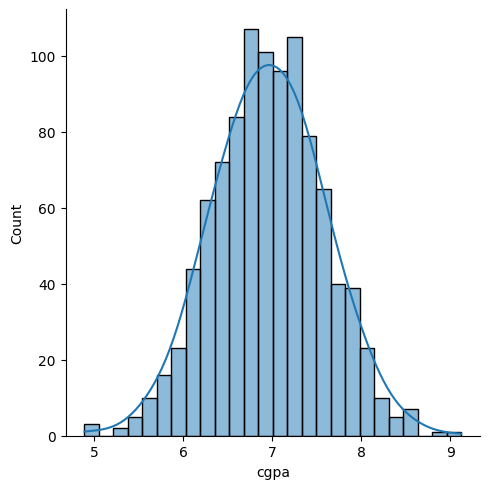

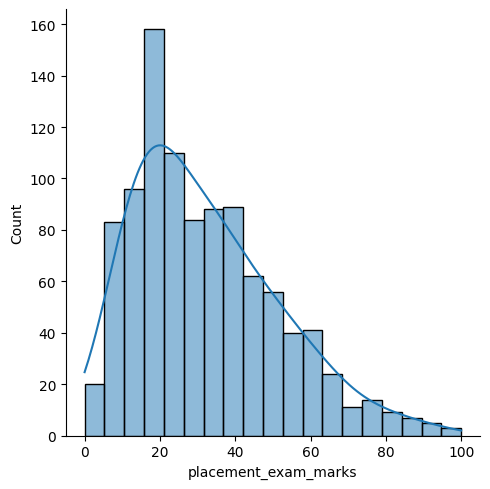

In [7]:
sns.displot(df['cgpa'],kde=True,kde_kws={'bw_adjust': 1.5})
sns.displot(df['placement_exam_marks'],kde=True,kde_kws={'bw_adjust': 1.5})
plt.show()

In [8]:
#cgpa is normally distributed but placement_exam_marks is left skewed

In [13]:
df['placement_exam_marks'].skew() # -> gives skewness of the data between -1 to 1. o is normal distribution. positive 1 is totally left skewd and -1 is totally right skewed

np.float64(0.8356419499466834)

In [14]:
df['cgpa'].skew() #->value very close to zero as it is normally distributed

np.float64(-0.014529938929314918)

In [16]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

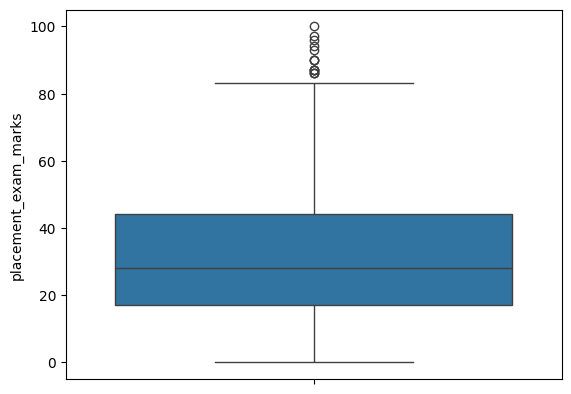

In [17]:
sns.boxplot(df['placement_exam_marks'])

In [20]:
#finding iqr
percentile75=df['placement_exam_marks'].quantile(0.75)
percentile25=df['placement_exam_marks'].quantile(0.25)

In [21]:
percentile75

np.float64(44.0)

In [23]:
iqr=percentile75-percentile25
iqr

np.float64(27.0)

In [26]:
upper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

In [27]:
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 84.5
lower limit -23.5


# 2. Finding Outliers:

In [28]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [29]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# 3. Trimming:

In [30]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [31]:
new_df.shape

(985, 3)

C:\Users\HP_15\AppData\Local\Temp\ipykernel_13488\3589405153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP_15\AppData\Local\Temp\ipykernel_13488\3589405153.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

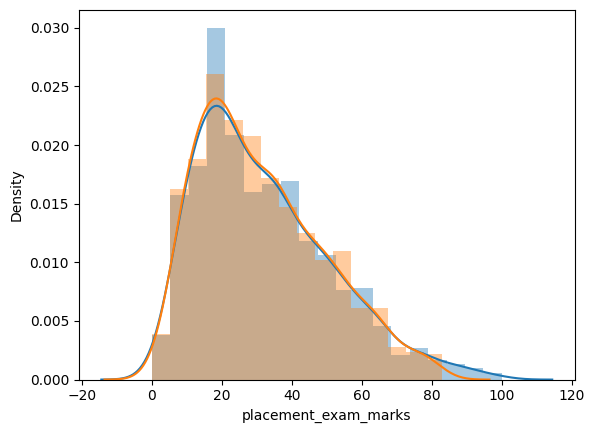

In [32]:
#comparing
sns.distplot(df['placement_exam_marks'])
sns.distplot(new_df['placement_exam_marks'])

not much difference in distribution

<Axes: ylabel='placement_exam_marks'>

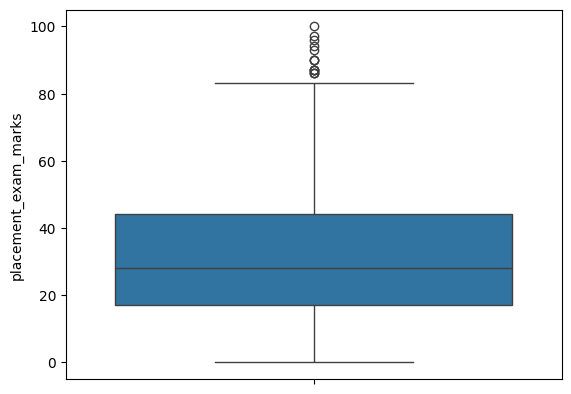

In [34]:
sns.boxplot(df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

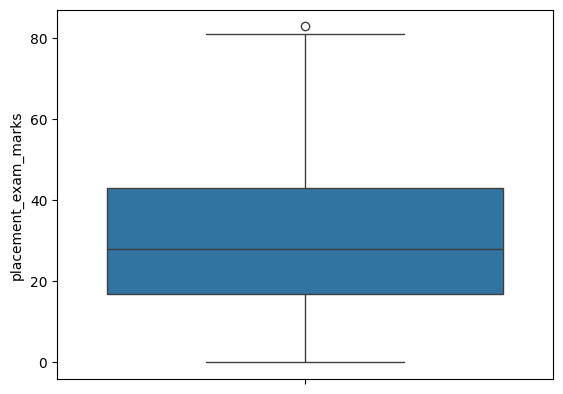

In [35]:
sns.boxplot(new_df['placement_exam_marks'])

# 4. Capping:

In [36]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [39]:
# np.where(condition,true,false)


In [40]:
new_df_cap.shape

(1000, 3)

C:\Users\HP_15\AppData\Local\Temp\ipykernel_13488\3538926932.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP_15\AppData\Local\Temp\ipykernel_13488\3538926932.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


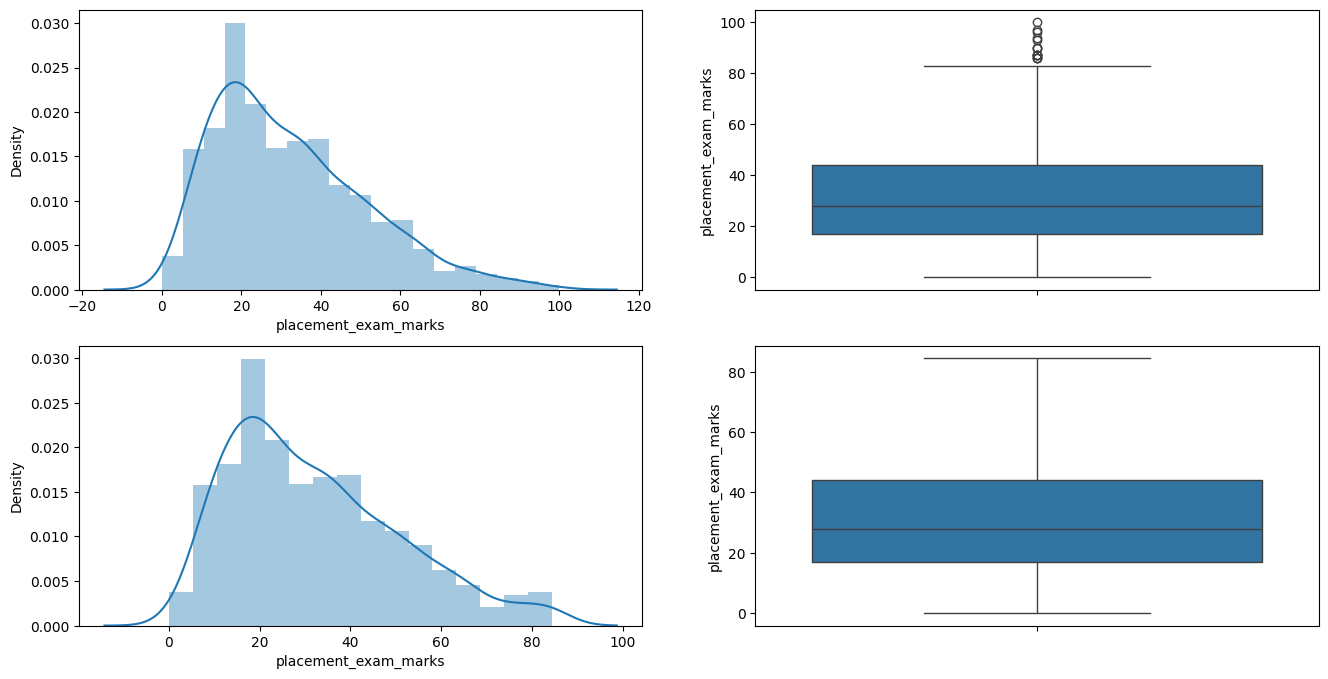

In [41]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()